# Unit-4 - Incremental Capstone - Deep Learning with TensorFlow and Keras

#### - _Aravind Kothandaraman_

# Task 1: Identify customers who churn the bank

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/0.3_Datasets/Churn_Modeling.csv

import pandas as pd
dataset = "/content/drive/MyDrive/Colab Notebooks/0.3_Datasets/Churn_Modeling.csv"
raw_df = pd.read_csv(dataset)

In [ ]:
raw_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
raw_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Identify and Remove Unnecessary Features

The dataset has columns that do not contribute to the prediction of customer churning -  `'RowNumber', 'CustomerId', 'Surname'`. Lets remove them as part of this step.




In [ ]:
core_df = raw_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
core_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encode Categorical Variables

Identify categorical variables ('Geography', 'Gender') and apply One-Hot Encoding, to convert them into a numerical variable, suitable for machine learning.


In [ ]:
core_df = pd.get_dummies(core_df, columns=['Geography', 'Gender'], drop_first=False)
core_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


### Creating Training-Test split sets

Split the data into training and test sets with 'Exited' as the target variable.

In [ ]:
from sklearn.model_selection import train_test_split

X = core_df.drop('Exited', axis=1)
y = core_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 13)
X_test shape: (2000, 13)
y_train shape: (8000,)
y_test shape: (2000,)


### Build the Artificial Neural Network (ANN)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input # Import Input layer

# Initializing the Seq classifier
classifier = Sequential()

# First, input layer with X_train.shape[1] as Input
classifier.add(Input(shape=(X_train.shape[1],))) # Use Input layer as the first layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

### Train and Evaluate the ANN Model

In [ ]:
# Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

print("Model trained successfully!")

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7794 - loss: 0.6051
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 0.5244
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.5017
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7915 - loss: 0.5146
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8015 - loss: 0.4998
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.5018
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7913 - loss: 0.5087
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7947 - loss: 0.5026
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7960 - loss: 0.5010
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.5131
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7931 - loss: 0.5045
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions (True/False)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Confusion Matrix:
[[1607    0]
 [ 393    0]]
Accuracy: 0.8035


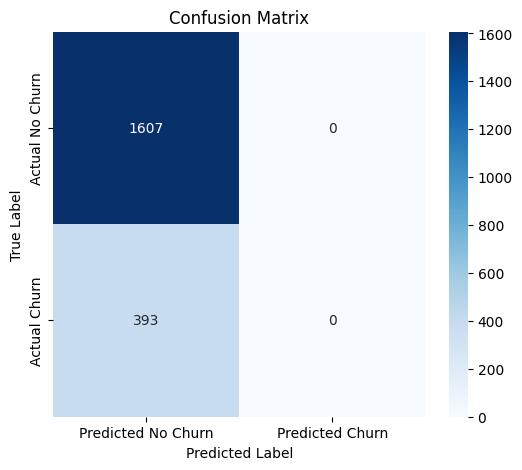

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Churn', 'Predicted Churn'], yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Model Accuracy
The model achieved an accuracy of **`{accuracy:.4f}`** on the test set. This means that the model correctly predicted whether a customer would churn or not approximately `{accuracy:.2%}` of the time. However, it's important to note that the confusion matrix shows that the model predicted 'No Churn' for all instances, leading to 0 true positives for 'Churn'. This indicates a potential issue with class imbalance or model sensitivity to the 'Churn' class. A high accuracy can be misleading if the dataset is imbalanced and the model is not capturing the minority class well.

### Addressing Class Imbalance with SMOTE

As observed from the previous confusion matrix, the model is heavily biased towards predicting the majority class ('No Churn'). This is a common problem in datasets where one class significantly outnumbers the other. Accuracy alone can be misleading in such cases.

To mitigate this, we will use the **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE works by creating synthetic samples for the minority class, effectively increasing its representation in the dataset without simply duplicating existing samples. This helps the model learn patterns from the minority class more effectively.

We will apply SMOTE only to the training data to avoid data leakage.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training data shape: {X_train.shape, y_train.shape}")
print(f"Resampled training data shape: {X_train_resampled.shape, y_train_resampled.shape}")
print(f"Class distribution before SMOTE (y_train):\n{y_train.value_counts()}")
print(f"Class distribution after SMOTE (y_train_resampled):\n{y_train_resampled.value_counts()}")

Original training data shape: ((8000, 13), (8000,))
Resampled training data shape: ((12712, 13), (12712,))
Class distribution before SMOTE (y_train):
Exited
0    6356
1    1644
Name: count, dtype: int64
Class distribution after SMOTE (y_train_resampled):
Exited
0    6356
1    6356
Name: count, dtype: int64


### Retrain and Evaluate ANN Model with Resampled Data

Now that the training data is balanced using SMOTE, we will retrain the Artificial Neural Network (ANN) model and evaluate its performance again. We expect to see an improvement in the model's ability to predict the minority class ('Churn').

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

# Re-initialize the Sequential classifier to ensure a fresh start
classifier_resampled = Sequential()

# Input layer with X_train_resampled.shape[1] as Input
classifier_resampled.add(Input(shape=(X_train_resampled.shape[1],)))
classifier_resampled.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Second hidden layer
classifier_resampled.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Output layer
classifier_resampled.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier_resampled.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier_resampled.summary()

# Fitting the ANN to the resampled training set
print("\nTraining model with resampled data...")
classifier_resampled.fit(X_train_resampled, y_train_resampled, batch_size=10, epochs=100)

print("Model trained successfully with resampled data!")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)


Training model with resampled data...
Epoch 1/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5138 - loss: 0.6931
Epoch 2/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5646 - loss: 0.6870
Epoch 3/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5569 - loss: 0.6872
Epoch 4/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5663 - loss: 0.6863
Epoch 5/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5701 - loss: 0.6838
Epoch 6/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5666 - loss: 0.6850
Epoch 7/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5606 - loss: 0.6860
Epoch 8/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5719 - loss: 0.6839
Epoch 9/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5585 - loss: 0.6859
Epoch 10/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5695 - loss: 0.6822
Epoch 11/100
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predicting the Test set results with the resampled model
y_pred_resampled = classifier_resampled.predict(X_test)
y_pred_resampled = (y_pred_resampled > 0.5) # Convert probabilities to binary predictions (True/False)

# Making the Confusion Matrix for the resampled model
cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print(f"Confusion Matrix (after SMOTE):\n{cm_resampled}")

# Calculate accuracy
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy (after SMOTE): {accuracy_resampled:.4f}")

# Calculate additional metrics to better evaluate performance on imbalanced data
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)

print(f"Precision (after SMOTE): {precision_resampled:.4f}")
print(f"Recall (after SMOTE): {recall_resampled:.4f}")
print(f"F1-Score (after SMOTE): {f1_resampled:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix (after SMOTE):
[[ 148 1459]
 [  11  382]]
Accuracy (after SMOTE): 0.2650
Precision (after SMOTE): 0.2075
Recall (after SMOTE): 0.9720
F1-Score (after SMOTE): 0.3420


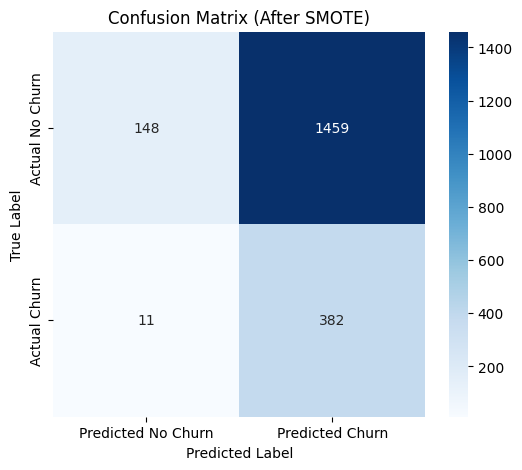

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the Confusion Matrix after SMOTE
plt.figure(figsize=(6, 5))
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Churn', 'Predicted Churn'], yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (After SMOTE)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Model Performance After SMOTE

After applying SMOTE to balance the training data, the model's performance has been re-evaluated. Notice the changes in the confusion matrix and the additional metrics like Precision, Recall, and F1-Score, which are more informative for imbalanced datasets than accuracy alone. The goal is to improve the model's ability to correctly identify the minority class (customers who churn) without significantly compromising its performance on the majority class.